<a href="https://colab.research.google.com/github/cbgarciaugr/Econometria/blob/main/Multicolinealidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2: Detección Multicolinealidad

## Tarea a realizar

   1. Obtener la matriz de correlaciones de las variables y el gráfico de color de las correlaciones. Comentar el signo de los  coeficientes esperados.
   2. Estimar el modelo e interpretar los coeficientes.
   3. Interpretar los estadísticos experimentales del test de significación individual a partir del p-valor y el test de significación global.
   4. Obtén a través del software el factor inflactor de la varianza y el número de condición y comenta los resultados.

### Ejemplo:
Cargamos la base de datos Inditex que relaciona las ventas con el número de empleados y el
número de tiendas para el periodo 2006-2020:

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import pandas as pd
datos= pd.read_excel ('DatosInditex.xlsx')
datos




,A,I,E,T,CE
0,2006,8196,69240,3131,0
1,2007,9435,79517,3691,0
2,2008,10407,89112,4264,0
3,2009,11084,92301,4607,0
4,2010,12597,100138,5044,1
5,2011,13793,109512,5527,1
6,2012,15946,120314,6009,1
7,2013,16724,128313,6340,1
8,2014,18117,137054,6683,1
9,2015,20900,152854,7013,1


### Obtenemos la matriz de correlaciones de las variables y el gráfico de color de las correlaciones. Comentar el signo de los  coeficientes esperados.


In [ ]:
y=datos["I"]
vars=["E", "T", "CE"]
X=datos[vars]
corr_matrix=np.corrcoef(y, X.T)
print(corr_matrix)

[[1.         0.99198372 0.95009798 0.73039793]
 [0.99198372 1.         0.97798144 0.76986657]
 [0.95009798 0.97798144 1.         0.85241359]
 [0.73039793 0.76986657 0.85241359 1.        ]]


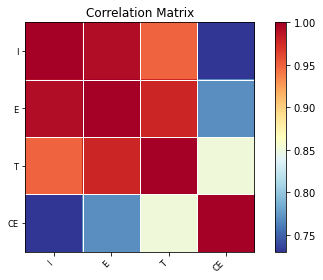

In [ ]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_matrix, xnames=["I", "E", "T", "CE"])
plt.show()

Se observa que el coeficiente de correlación entre la variable a explicar "Ingresos" y cada una de las variables explicativas es positivo, por lo que el signo esperado sería positivo.  Es decir, a mayor número de empleados, mayores ingresos; a mayor numero de tiendas, mayores ingresos, y mayores ingresos en los años con comercio electronico.
Además, la correlación entre el numero de empleados y el numero de tiendas es superior a 0.95 por lo que puede existir problemas de multicolinealidad.

### Estimar el modelo e interpretar los coeficientes.

In [ ]:
mco1 = sm.OLS(y, sm.add_constant(X)).fit()
mco1.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      I   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     620.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.51e-12
Time:                        09:47:06   Log-Likelihood:                -113.92
No. Observations:                  15   AIC:                             235.8
Df Residuals:                      11   BIC:                             238.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2311.2416   1126.759     -2.051      0.065   -4791.222     168.739
E              0.2769      0.024     11.310      0.000       0.223       0.331
T             -2.7447      0.739     -3.714      0.003      -4.371      -1.118
CE           984.6658    772.821      1.274      0.229    -716.301    2685.633
==============================================================================
Omnibus:                        3.860   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                1.690
Skew:                           0.765   Prob(JB):                        0.430
Kurtosis:                       3.601   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se observa que el signo de la variable numero de tiendas es negativo en contra de lo esperado. El signo de la variable numero de empleaados si es positivo tal y como se esperaba.

### Interpretar los estadísticos experimentales del test de significación individual a partir del p-valor y el test de significación global.

 Se observa que el parámetro que acompaña a la constante es significativo solo al 90% de confianza, los parámetros asociados a las variables E y T son significativos al 90, 95 y 99% de confianza y el parámetro que acompaña a la variable Comercio Electronico no es significativo a ninguno de los niveles de confianza habituales. Por ello, procedemos a eliminarlo de la regresión.
En cuanto al modelo, es globalmente significativo ya que el p-valor es practicamente 0.

In [ ]:
y=datos["I"]
vars=["E", "T",]
X=datos[vars]

mco2 = sm.OLS(y, sm.add_constant(X)).fit()
mco2.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      I   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     883.7
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.41e-14
Time:                        09:48:05   Log-Likelihood:                -114.95
No. Observations:                  15   AIC:                             235.9
Df Residuals:                      12   BIC:                             238.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3435.5333    718.643     -4.781      0.000   -5001.323   -1869.744
E              0.2587      0.020     12.695      0.000       0.214       0.303
T             -2.0413      0.504     -4.051      0.002      -3.139      -0.944
==============================================================================
Omnibus:                        2.991   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                1.230
Skew:                           0.669   Prob(JB):                        0.541
Kurtosis:                       3.424   Cond. No.                     6.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Obtén a través del software el factor inflactor de la varianza y el número de condición y comenta los resultados.

In [ ]:
mco2.condition_number #Número de Condición

638099.0259935405

In [ ]:
mco1.condition_number #Número de Condición

1185202.0731088382

In [ ]:
import statsmodels.stats.outliers_influence as oi
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[259.32648631517714, 259.32648631517714]